In [1]:
import anndata as ad
import numpy as np

from core.preprocessor import Preprocessor
from core.normalizer import Normalizer
from plotmodules.norm_plots import *

CT_COUNTS_META_PATH = 'ct_counts_public_meta.h5ad'

ct_counts_metadata = ad.read_h5ad(CT_COUNTS_META_PATH)


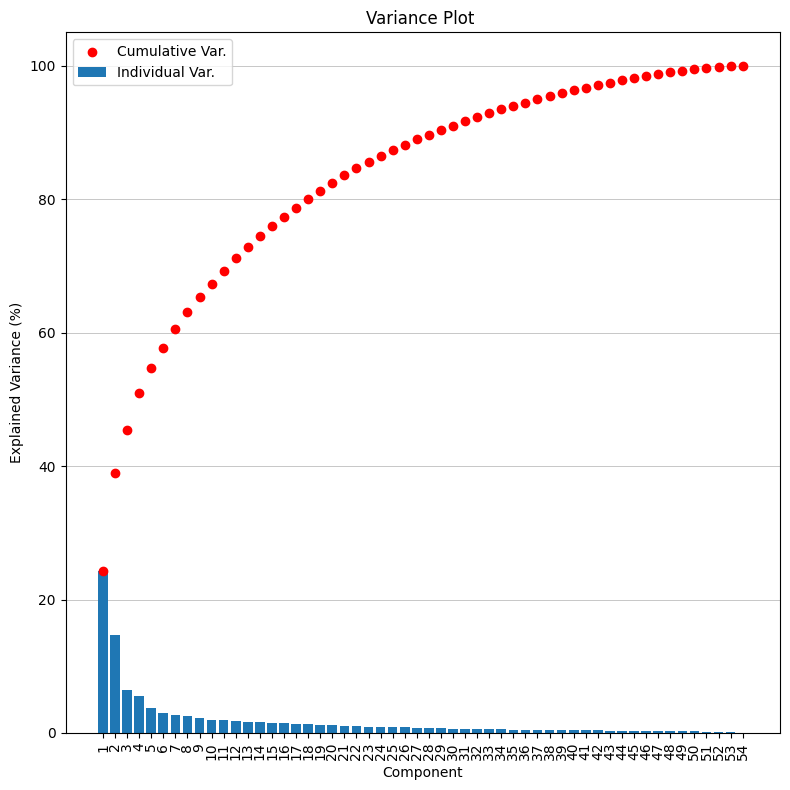

/home/jacob/Documents/BEP/bsc-thesis-scripts/core/preprocessor.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()
/home/jacob/Documents/BEP/bsc-thesis-scripts/core/preprocessor.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


View of AnnData object with n_obs × n_vars = 416 × 54
    obs: 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'projid'

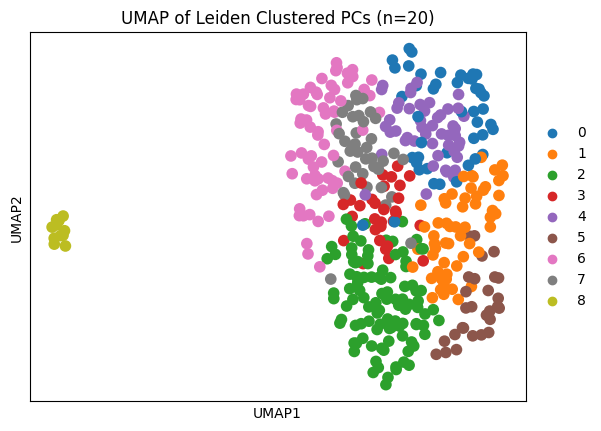

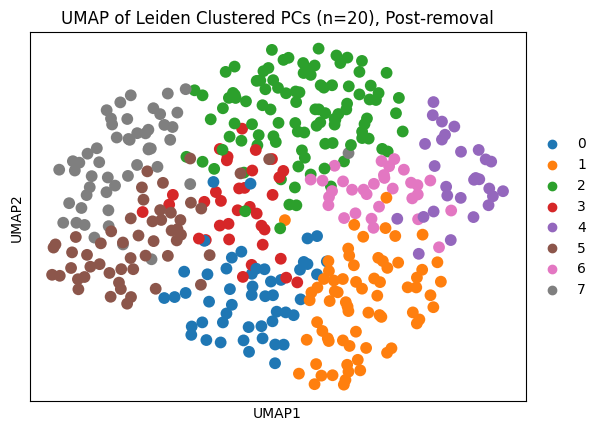

In [2]:
pp = Preprocessor('umap')
pp.show_pca(ct_counts_metadata)
pp.set_n_components(20)
pp.analyze_umap(ct_counts_metadata)
pp.remove_cluster(ct_counts_metadata, '8')

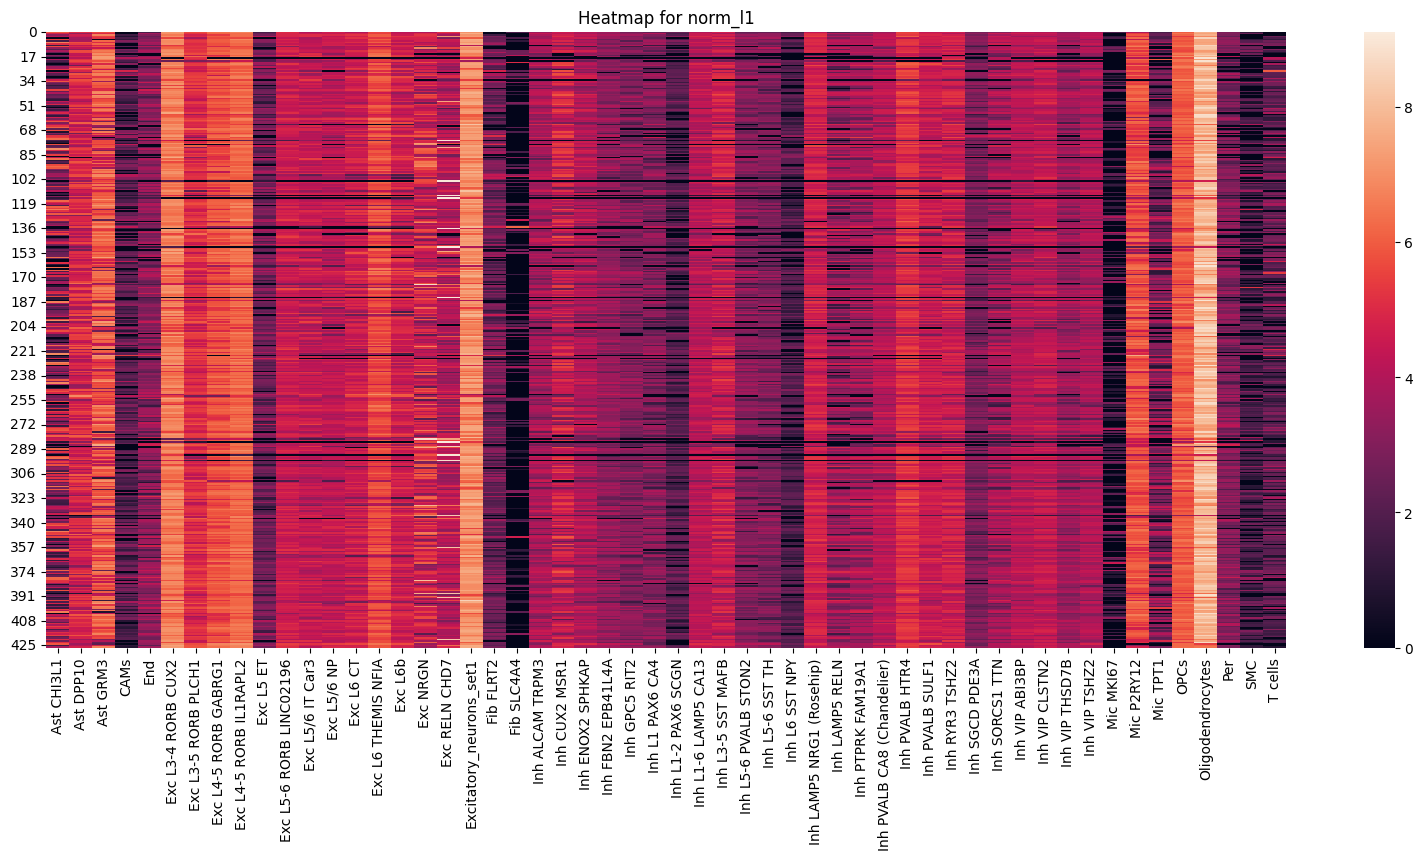

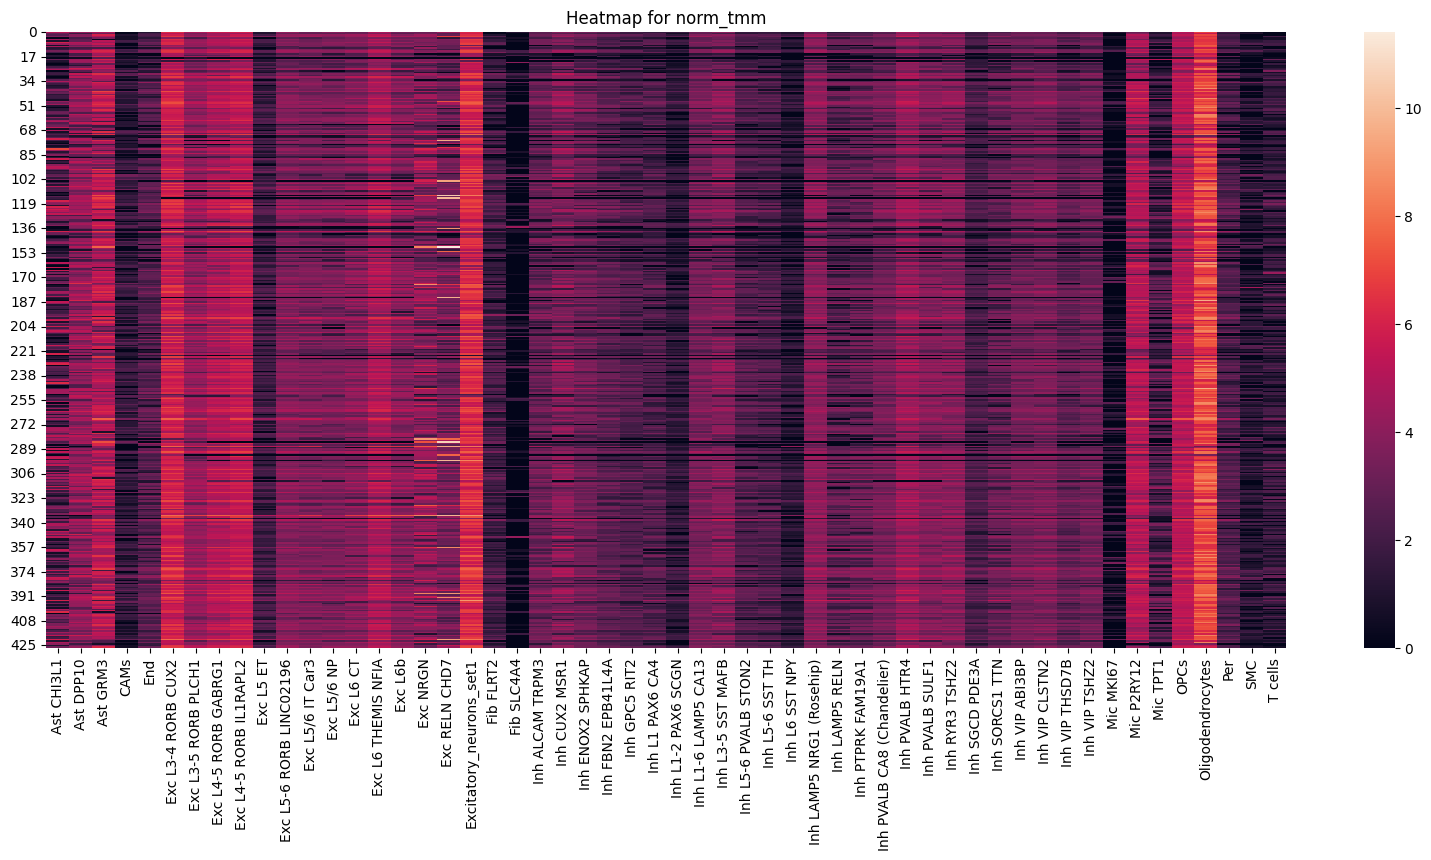

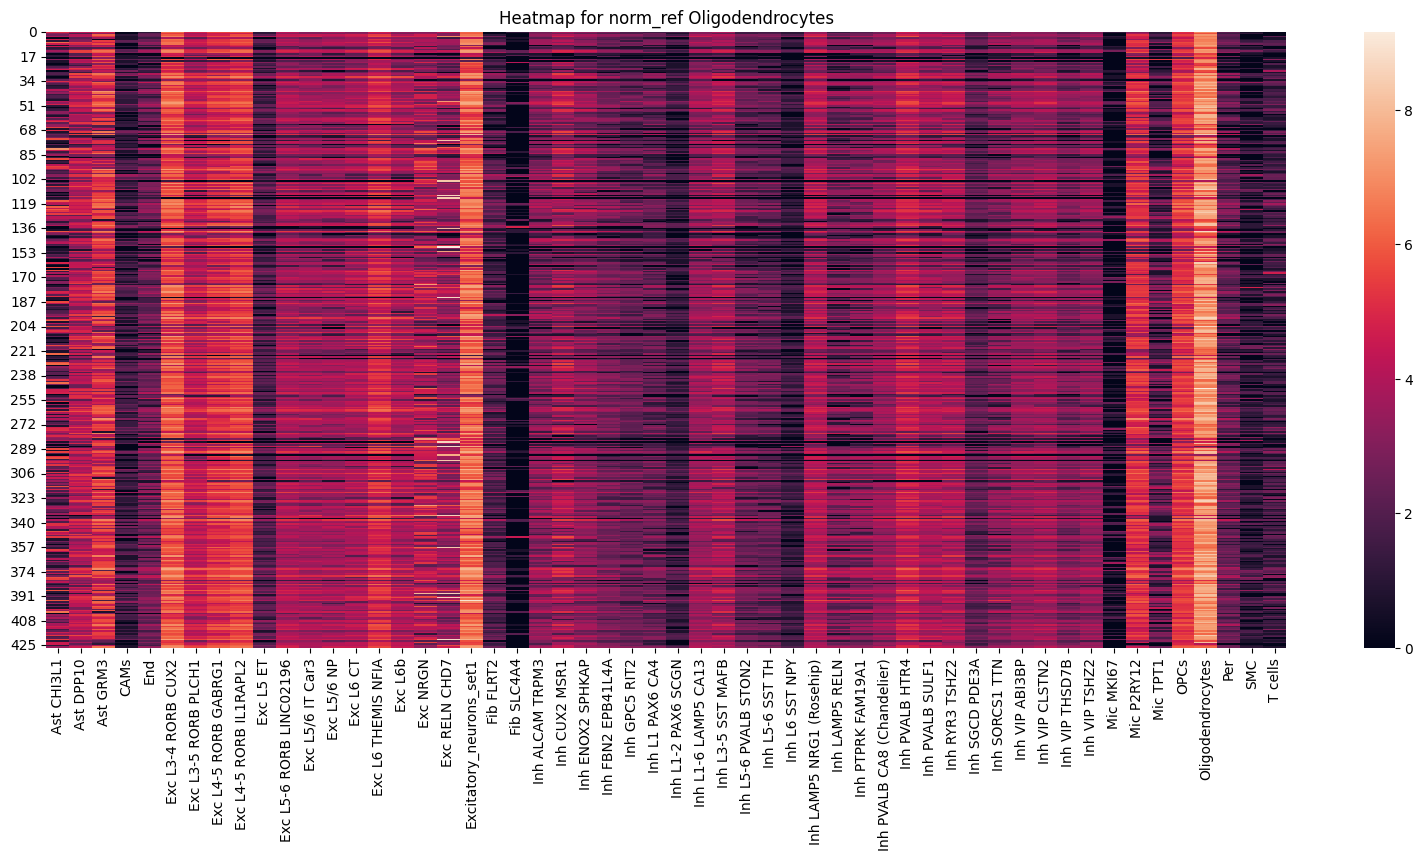

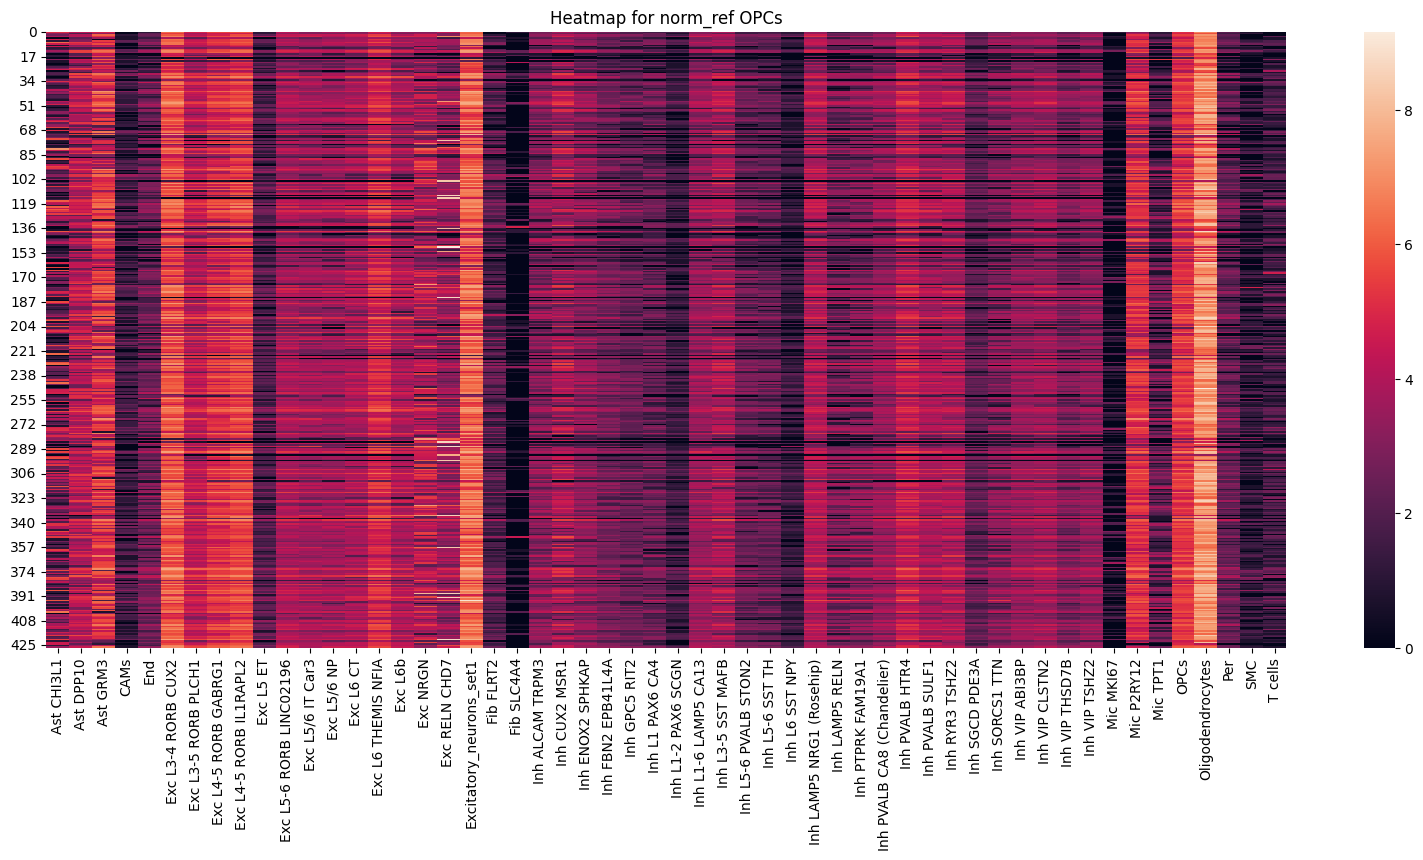

In [3]:
normalizer = Normalizer(['l1', 'tmm', 'ref Oligodendrocytes', 'ref OPCs'], np.log1p)
normalizer.normalize_all(ct_counts_metadata)

for layer in normalizer.layer_names:
    generate_heatmap(ct_counts_metadata, layer)